## Homework 1
### Mathematical & Computational Modeling of Infectious Diseases
#### Caleb Cordsen

In [1]:
# Import numpy for linspace and matplotlib 
import numpy as np
import matplotlib.pylab as plt
import math
from scipy.optimize import fsolve

#### <u>Problem 1</u>

In [2]:
# Define a function SIR Simulation plot that will simulate the basic SIR model displaying the S,I,R values at time T
# using Forward Euler's Solver described in class
# It will take in values for N, Initial S, Initial I, Initial R, Beta, Gamma, and the last time value you want displayed
def SIRSimulationPlot(N,InitS,InitI,InitR,Beta,Gamma,timeEnd):
    # Create an array using np.linspace that will go from 0 to the specified time end. It will create 100,000 evenly spaced entries
    # between those points to serve as our time values. I chose 100,000 to get very smooth curves when plotting
    timeSeries = np.linspace(0,timeEnd,100000)
    # Due to the nature of linspace, all entries are evenly spaced therefore deltaT will remain constant so we can calculate it
    # by looking at the first two entries in the time series difference
    deltaT = timeSeries[1]-timeSeries[0]
    # Set up lists to contain S, I, R values. Populate the first entry with initial values
    SValues = [InitS]
    IValues = [InitI]
    RValues = [InitR]
    # Loop through the timeSeries grabbing both its position in the list (0,1,2 etc) and its actual value
    for index,value in enumerate(timeSeries):
        #print(index,value)
        # If it is not the first value aka 0 then we will calculate based on Forward Euler
        if(value!=0):
            # We know from forward Euler that yn+1 = yn+deltaY where deltay is equal to deltaT*f(tn,yn)
            # In class we derived that for example S1 = S0 + deltaT*(-Beta*S0*I0/N). Essentially we said f(tn,yn) would be
            # the slope aka S dot at that time. So I have coded this below but generalized so it looks at the previous values
            # in things like SValues and IValues by indexing - 1
            newS = SValues[index-1]+deltaT*(-Beta*(SValues[index-1]*IValues[index-1])/N)
            # To calculate the I's and R's it is the same setup as above but replace where Sdot appeared with Idot and Rdot
            newI = IValues[index-1]+deltaT*((Beta*(SValues[index-1]*IValues[index-1])/N)-(Gamma*IValues[index-1]))
            newR = RValues[index-1]+deltaT*(Gamma*IValues[index-1])
            # Append the newly calculated values
            SValues.append(newS)
            IValues.append(newI)
            RValues.append(newR)
    # Plot the results and give appropiate axis titles and graph title
    # This article was used to figure out how to put greek letters into strings
    # https://medium.com/@johinamaria/how-to-print-chi-square-alpha-or-beta-in-a-plot-in-python-d0d461219c00
    plt.title("Caleb's SIR Simulation Where \u03B2="+str(Beta)+" and \u03B3="+str(Gamma))
    plt.xlabel("Time")
    plt.ylabel("People")
    # Plot each list of values against the time series and give them appropiate colors and labels
    plt.plot(timeSeries,SValues,"blue",label="S Caleb")
    plt.plot(timeSeries,IValues,"red",label="I Caleb")
    plt.plot(timeSeries,RValues,"black",label="R Caleb")
    # This link was used to make sure the axis both start at 0,0 in the bottom left rather than
    # having gaps
    # https://www.tutorialspoint.com/how-to-show-0-0-on-matplotlib-graph-at-the-bottom-left-corner
    plt.xlim([0,50])
    plt.ylim([0,1050])
    # Set the legends location
    plt.legend(loc="center right")
    plt.show()
    

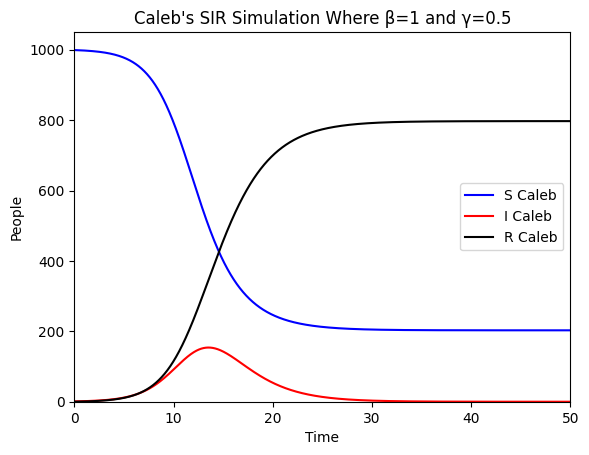

In [3]:
# Problem 1 Plot 1 where Beta = 1 and Gamma = 0.5
SIRSimulationPlot(1000,999,1,0,1,0.5,50)

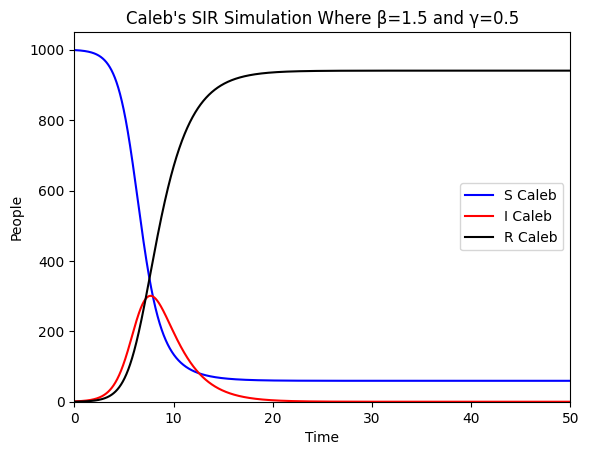

In [4]:
# Problem 1 Plot 2 where Beta = 1.5 and Gamma = 0.5
SIRSimulationPlot(1000,999,1,0,1.5,0.5,50)

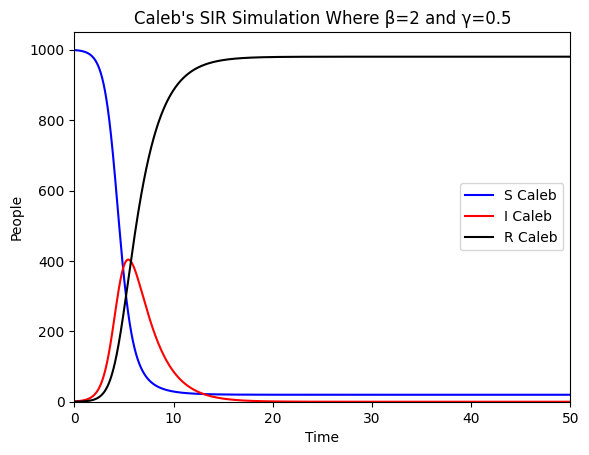

In [5]:
# Problem 1 Plot 3 where Beta = 2 and Gamma = 0.5
SIRSimulationPlot(1000,999,1,0,2,0.5,50)

#### <u>Problem 3</u>

In [6]:
# Make a function that takes in an R-Naught that will then plot to try to find rinf
def rInfinite(RNot):
    # Set up an array using linspace from 0 to 1 (little r is bounded between 0 to 1) and uses 10,000 points
    timeSeries = np.linspace(0,1,10000)
    # Create empty lists for f and g
    fValues = []
    gValues = []
    for i in timeSeries:
        # For f, just append the timeSeries value to basically plot the line x = y
        fValues.append(i)
        # For g calculate the value based on 1-e^(-R-Naught*x)=y
        newgValue = 1-math.e**(-RNot*i)
        # Append the new value
        gValues.append(newgValue)
    # Make a function to solve for roots by doing as write up recommends f-g (x-(1-math.e**(-RNot*i)))
    def func(x):
        y = x - 1 + math.e**(-RNot*x)
        return y
    # I experimented with a couple different values for where the root might be and found that if you went lower than the root, it would never find it
    # but if you went higher it would so I went with 1.1 since we are only interested really in roots below 1 since little r is bounded 0 to 1
    root = fsolve(func,1.1)
    # Make a string of where the root is
    rootStr = "("+str(round(root[0],4))+","+str(round(root[0],4))+")"
    # Plot the f values against time series, the g values against time series, and also a point of the root
    plt.plot(timeSeries,fValues,"black",label="f")
    plt.plot(timeSeries,gValues,"red",label="g")
    # Note that the label will have a rounded version of the root
    plt.scatter(root[0],root[0],c="blue",label=rootStr)
    # Display the legend
    plt.legend(loc="upper left")
    plt.show()
    # Print the actual unrounded version of the root
    print("The root is located at "+str(root[0])+","+str(root[0]))

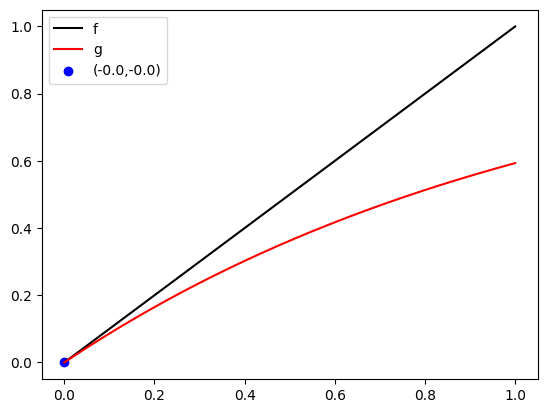

The root is located at -1.1473401775968987e-15,-1.1473401775968987e-15


In [8]:
rInfinite(0.9)

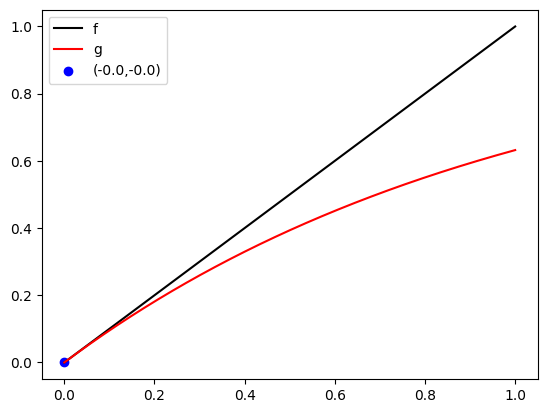

The root is located at -5.720912486536165e-10,-5.720912486536165e-10


In [9]:
rInfinite(1.0)

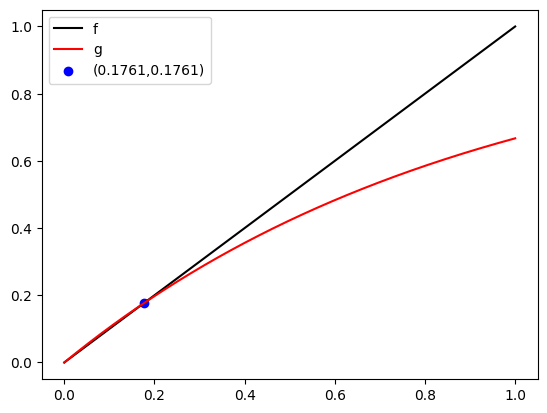

The root is located at 0.17613414363180968,0.17613414363180968


In [10]:
rInfinite(1.1)

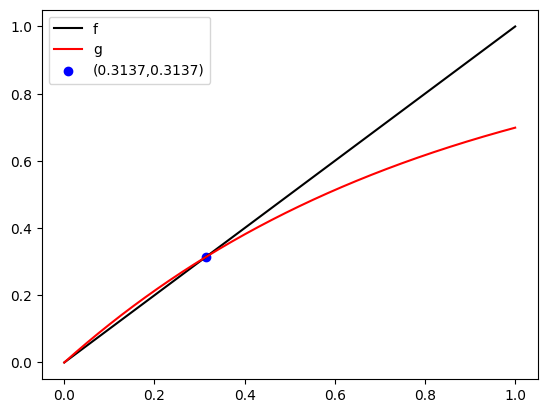

The root is located at 0.3136983310412176,0.3136983310412176


In [11]:
rInfinite(1.2)

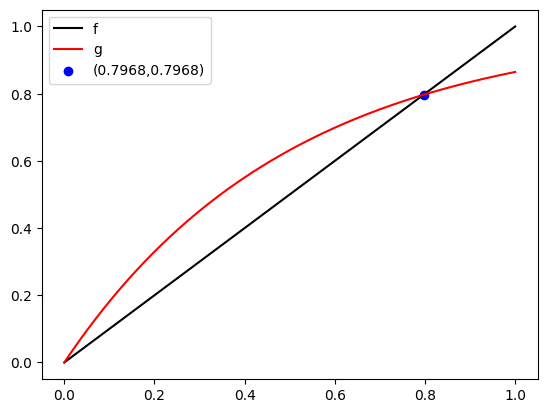

The root is located at 0.79681213002002,0.79681213002002


In [7]:
rInfinite(2)

In [12]:
# Define a function SIR Simulation plot that will simulate the basic SIR model displaying the S,I,R values at time T
# using Forward Euler's Solver described in class as well as plot a green dotted line representing an inputed rinf value
# It will take in values for N, Initial S, Initial I, Initial R, Beta, Gamma, and the last time value you want displayed
def SIRSimulationPlotWithrinfLine(N,InitS,InitI,InitR,Beta,Gamma,timeEnd,rinf):
    # Create an array using np.linspace that will go from 0 to the specified time end. It will create 100,000 evenly spaced entries
    # between those points to serve as our time values. I chose 100,000 to get very smooth curves when plotting
    timeSeries = np.linspace(0,timeEnd,100000)
    # Due to the nature of linspace, all entries are evenly spaced therefore deltaT will remain constant so we can calculate it
    # by looking at the first two entries in the time series difference
    deltaT = timeSeries[1]-timeSeries[0]
    # Set up lists to contain S, I, R values. Populate the first entry with initial values
    SValues = [InitS]
    IValues = [InitI]
    RValues = [InitR]
    # Loop through the timeSeries grabbing both its position in the list (0,1,2 etc) and its actual value
    for index,value in enumerate(timeSeries):
        #print(index,value)
        # If it is not the first value aka 0 then we will calculate based on Forward Euler
        if(value!=0):
            # We know from forward Euler that yn+1 = yn+deltaY where deltay is equal to deltaT*f(tn,yn)
            # In class we derived that for example S1 = S0 + deltaT*(-Beta*S0*I0/N). Essentially we said f(tn,yn) would be
            # the slope aka S dot at that time. So I have coded this below but generalized so it looks at the previous values
            # in things like SValues and IValues by indexing - 1
            newS = SValues[index-1]+deltaT*(-Beta*(SValues[index-1]*IValues[index-1])/N)
            # To calculate the I's and R's it is the same setup as above but replace where Sdot appeared with Idot and Rdot
            newI = IValues[index-1]+deltaT*((Beta*(SValues[index-1]*IValues[index-1])/N)-(Gamma*IValues[index-1]))
            newR = RValues[index-1]+deltaT*(Gamma*IValues[index-1])
            # Append the newly calculated values
            SValues.append(newS)
            IValues.append(newI)
            RValues.append(newR)
    # Make an array that will let us plot the rinf value
    # Note that little rinf is a fraction of our population but we are plotting total people so we need to multiple by N
    rinfVals = [rinf*N for i in timeSeries]
    # Plot the results and give appropiate axis titles and graph title
    # This article was used to figure out how to put greek letters into strings
    # https://medium.com/@johinamaria/how-to-print-chi-square-alpha-or-beta-in-a-plot-in-python-d0d461219c00
    plt.title("Caleb's SIR Simulation Where \u03B2="+str(Beta)+" and \u03B3="+str(Gamma))
    plt.xlabel("Time")
    plt.ylabel("People")
    # Plot each list of values against the time series and give them appropiate colors and labels
    plt.plot(timeSeries,SValues,"blue",label="S Caleb")
    plt.plot(timeSeries,IValues,"red",label="I Caleb")
    plt.plot(timeSeries,RValues,"black",label="R Caleb")
    plt.plot(timeSeries,rinfVals,color="green",linestyle="dotted",label="r_inf")
    # This link was used to make sure the axis both start at 0,0 in the bottom left rather than
    # having gaps
    # https://www.tutorialspoint.com/how-to-show-0-0-on-matplotlib-graph-at-the-bottom-left-corner
    plt.xlim([0,50])
    plt.ylim([0,1050])
    # Set the legends location
    plt.legend(loc="center right")
    plt.show()

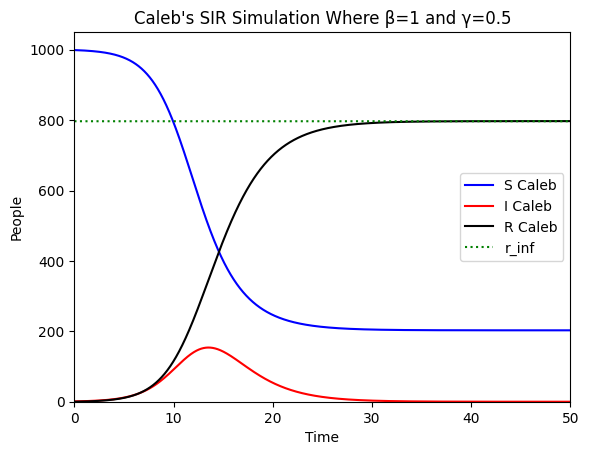

In [13]:
SIRSimulationPlotWithrinfLine(1000,999,1,0,1,0.5,50,0.79681213002002)

#### <u>Problem 4</u> 
##### Nevermind I was running into overflow errors and weird behavior from my equation code so could not finish

In [68]:
# THE ONLY DIFFERENCE HERE IS THERE ARE NO TICK LIMITS FOR ACCESS COUNTER

# Define a function SIR Simulation plot that will simulate the basic SIR model displaying the S,I,R values at time T
# using Forward Euler's Solver described in class
# It will take in values for N, Initial S, Initial I, Initial R, Beta, Gamma, and the last time value you want displayed
def SIRSimulationPlot4(N,Inits,Initi,Initr,Beta,Gamma,timeEnd):
    # Create an array using np.linspace that will go from 0 to the specified time end. It will create 100,000 evenly spaced entries
    # between those points to serve as our time values. I chose 100,000 to get very smooth curves when plotting
    timeSeries = np.linspace(0,timeEnd)
    # Due to the nature of linspace, all entries are evenly spaced therefore deltaT will remain constant so we can calculate it
    # by looking at the first two entries in the time series difference
    deltaT = timeSeries[1]-timeSeries[0]
    # Set up lists to contain S, I, R values. Populate the first entry with initial values
    sValues = np.zeros(len(timeSeries))
    iValues = np.zeros(len(timeSeries))
    rValues = np.zeros(len(timeSeries))
    sValues[0] = Inits
    iValues[0] = Initi
    rValues[0] = Initr
    # Loop through the timeSeries grabbing both its position in the list (0,1,2 etc) and its actual value
    for index,value in enumerate(timeSeries):
        #print(index,value)
        # If it is not the first value aka 0 then we will calculate based on Forward Euler
        if(value!=0):
            # We know from forward Euler that yn+1 = yn+deltaY where deltay is equal to deltaT*f(tn,yn)
            # In class we derived that for example S1 = S0 + deltaT*(-Beta*S0*I0/N). Essentially we said f(tn,yn) would be
            # the slope aka S dot at that time. So I have coded this below but generalized so it looks at the previous values
            # in things like SValues and IValues by indexing - 1
            news = sValues[index-1]+deltaT*(-Beta*(sValues[index-1]*iValues[index-1]))
            # To calculate the I's and R's it is the same setup as above but replace where Sdot appeared with Idot and Rdot
            newi = iValues[index-1]+deltaT*((Beta*(sValues[index-1]*iValues[index-1]))-(Gamma*iValues[index-1]))
            newr = rValues[index-1]+deltaT*(Gamma*iValues[index-1])
            # Append the newly calculated values
            sValues[index] = news
            iValues[index] = newi
            rValues[index] = newr
    # Plot the results and give appropiate axis titles and graph title
    # This article was used to figure out how to put greek letters into strings
    # https://medium.com/@johinamaria/how-to-print-chi-square-alpha-or-beta-in-a-plot-in-python-d0d461219c00
    plt.title("Caleb's SIR Simulation Where \u03B2="+str(Beta)+" and \u03B3="+str(Gamma))
    plt.xlabel("Time")
    plt.ylabel("People")
    # Plot each list of values against the time series and give them appropiate colors and labels
    SValues = sValues*N
    IValues = iValues*N
    RValues = rValues*N
    plt.plot(timeSeries,SValues,"blue",label="S Caleb")
    plt.plot(timeSeries,IValues,"red",label="I Caleb")
    plt.plot(timeSeries,RValues,"black",label="R Caleb")
    # This link was used to make sure the axis both start at 0,0 in the bottom left rather than
    # having gaps
    # https://www.tutorialspoint.com/how-to-show-0-0-on-matplotlib-graph-at-the-bottom-left-corner
    # Set the legends location
    plt.legend(loc="center left")
    plt.show()

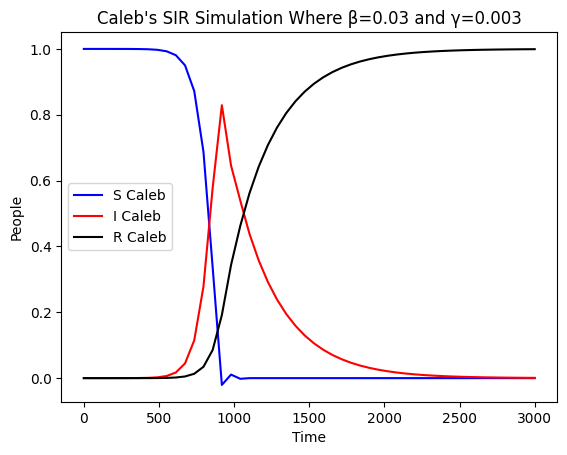

In [83]:
# Problem 1 Plot 1 where Beta = 1 and Gamma = 0.5
# ef SIRSimulationPlot(N,InitS,InitI,InitR,Beta,Gamma,timeEnd):
N = 1000000
Ep = 1/N
SIRSimulationPlot4(1,1-Ep,Ep,0,0.03,0.003,3000)